In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df_student = pd.read_excel("student_scores.xlsx", header=0)
df_student.head()

,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df_student

,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
df_student.columns = ['hours', 'scores']

In [13]:
print("Jumlah data duplikat:",df_student.duplicated().sum())


Jumlah data duplikat: 0


In [14]:
print("Cek missing value:\n", df_student.isnull().sum())

Cek missing value:
 hours     0
scores    0
dtype: int64


In [15]:
print("\nDescriptive Statistics:")
print(df_student.describe())
print("\nCorrelation:")
print(df_student.corr())



Descriptive Statistics:
           hours     scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Correlation:
           hours    scores
hours   1.000000  0.976191
scores  0.976191  1.000000


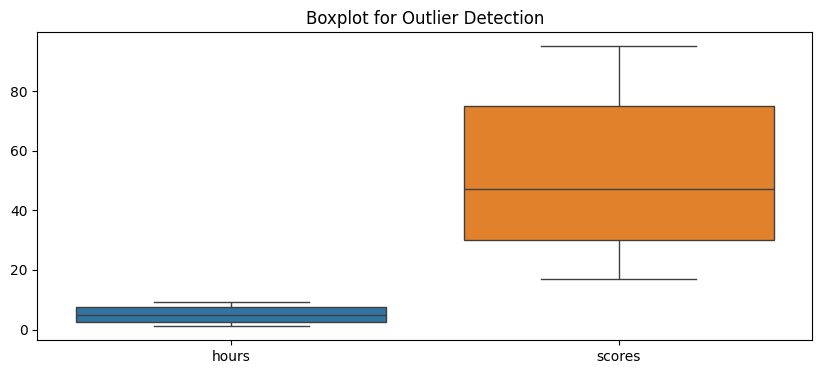

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_student)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [18]:
Q1 = df_student.quantile(0.25)
Q3 = df_student.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_student < (Q1 - 1.5 * IQR)) | (df_student > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers Detected:\n", outliers)


Outliers Detected:
 hours     0
scores    0
dtype: int64


In [19]:
X = df_student[['hours']]
y = df_student['scores']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [22]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [24]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

In [25]:
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree Regressor", y_test, dt_pred)


Linear Regression Evaluation:
MSE: 18.943211722315272
RMSE: 4.352380006653288
R2 Score: 0.9678055545167994

Decision Tree Regressor Evaluation:
MSE: 31.7
RMSE: 5.630275304103699
R2 Score: 0.9461250849762066


In [27]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

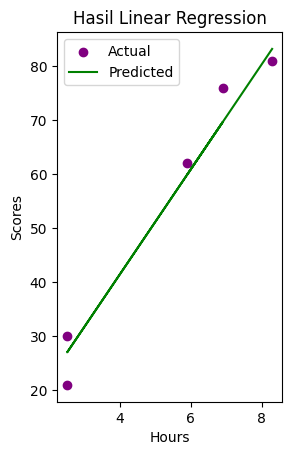

In [30]:
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='purple', label='Actual')
plt.plot(X_test, lr_pred, color='green', label='Predicted')
plt.title("Hasil Linear Regression")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()

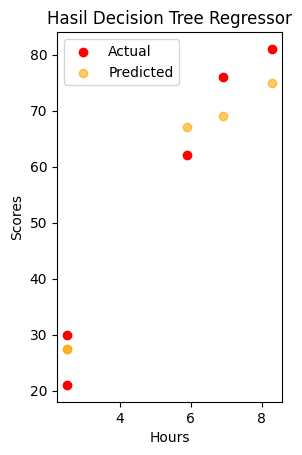

In [34]:
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, dt_pred, color='orange', label="Predicted", alpha=0.6)
plt.title("Hasil Decision Tree Regressor")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
